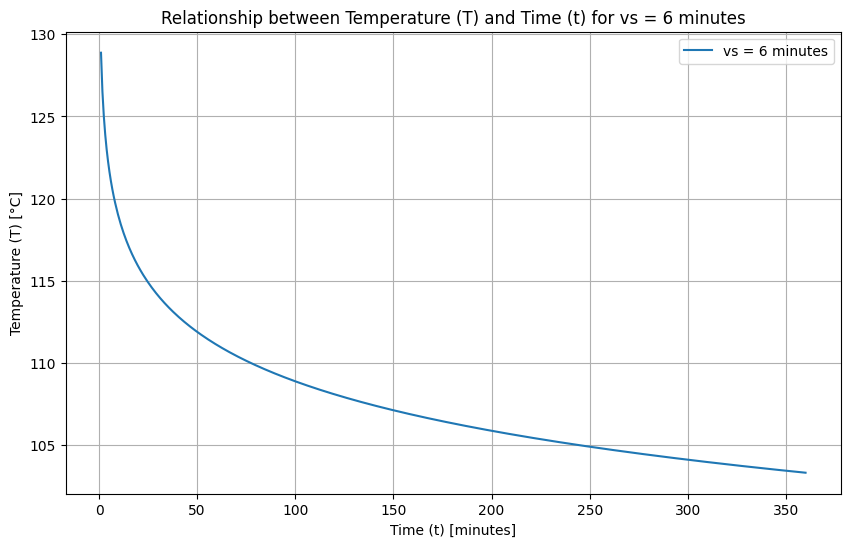

In [3]:

import numpy as np
import matplotlib.pyplot as plt


def calculate_T_values(vs, t_values):
    return 121.1 + 10 * np.log10(vs / t_values)


vs = 6

# Generate a range of times t (in minutes)
t_values = np.linspace(1, 360, 500)  

# Calculate corresponding T values (in degrees Celsius)
T_values = calculate_T_values(vs, t_values)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(t_values, T_values, label=f'vs = {vs} minutes')
plt.xlabel('Time (t) [minutes]')
plt.ylabel('Temperature (T) [°C]')
plt.title(f'Relationship between Temperature (T) and Time (t) for vs = {vs} minutes')
plt.legend()
plt.grid(True)
plt.show()


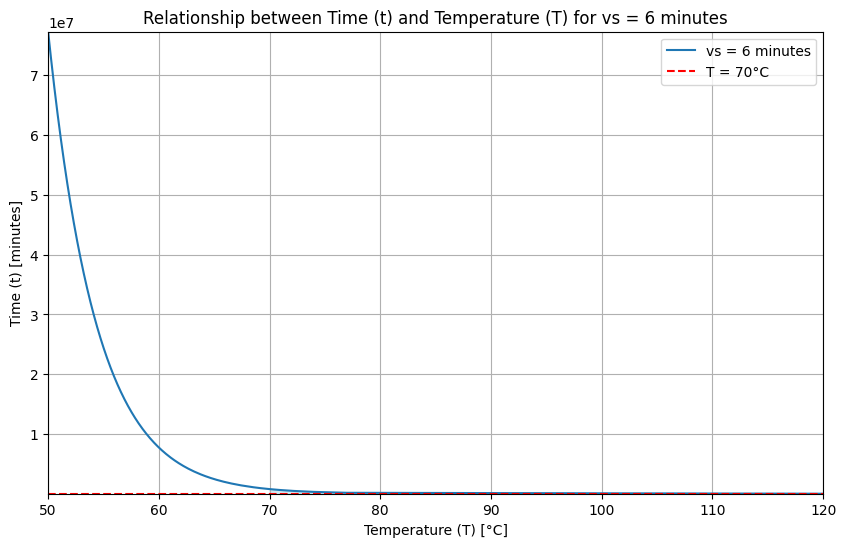

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_T_values(vs, t_values):
    return 121.1 + 10 * np.log10(vs / t_values)

vs=6
# Define the desired temperature range
T_min = 50  # Minimum temperature in °C
T_max = 120  # Maximum temperature in °C

# Calculate the corresponding time range that corresponds to the desired temperature range
t_values = np.linspace(vs / (10**(0.1 * (T_max - 121.1))), vs / (10**(0.1 * (T_min - 121.1))), 500)

# Calculate corresponding T values (in degrees Celsius)
T_values = calculate_T_values(vs, t_values)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(T_values, t_values, label=f'vs = {vs} minutes')
plt.xlabel('Temperature (T) [°C]')
plt.ylabel('Time (t) [minutes]')
plt.title(f'Relationship between Time (t) and Temperature (T) for vs = {vs} minutes')
plt.axhline(y=70, color='r', linestyle='--', label='T = 70°C')
plt.fill_betweenx(t_values, 70, T_values, where=(T_values > 70), color='lightblue', alpha=0.5)
plt.ylim(min(t_values), max(t_values))  # Set the y-axis limits to fit the desired time range
plt.xlim(T_min, T_max)  # Set the x-axis limits to fit the desired temperature range
plt.legend()
plt.grid(True)
plt.show()


In [1]:
import numpy as np

def cin_degrad(T, Tref, z):
    """
    Compute sterility value at a given temperature.
    
    Parameters:
    T (float or array-like): Temperature [°C]
    Tref (float): Reference temperature [°C]
    z (float): z-value [°C]
    
    Returns:
    SV (float or numpy.ndarray): Sterility value
    """
    return 10 ** ((T - Tref) / z)

def sterility_value(T, t_s, Tref, z):
    """
    Compute sterility value from temperature profile according to Bigelow method.
    
    Parameters:
    T (array-like): Temperature profile [°C]
    t_s (array-like): Time profile [s]
    Tref (float): Reference temperature [°C]
    z (float): z-value [°C]
    
    Returns:
    SV (numpy.ndarray): Sterility value [min]
    """
    Fbigelowdt = []
    for j in range(1, len(T) - 1):
        # Integration with Simpson's rule
        FB = (t_s[j + 1] - t_s[j]) * (cin_degrad(T[j - 1], Tref, z) 
                                      + 4 * cin_degrad(T[j], Tref, z) 
                                      + cin_degrad(T[j + 1], Tref, z)) / 6
        Fbigelowdt.append(FB)
    
    SV = np.cumsum(Fbigelowdt) / 60  # Convert from seconds to minutes
    return SV

# Example usage
T = [120, 125, 130, 125, 120]  # Example temperature profile [°C]
t_s = [0, 60, 120, 180, 240]  # Example time profile [s]
Tref = 121  # Reference temperature [°C]
z = 10  # z-value [°C]

SV = sterility_value(T, t_s, Tref, z)
print(SV)


[ 3.13085938  9.26367643 12.39453581]
